In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

sys.path.append('..')

/mnt/home/snakoneczny/tools/anaconda3/envs/python3-gpu/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

In [34]:
def plot_training_history(history, title, idx_start=0):
    plt.plot(np.arange(idx_start, len(history)), history[idx_start:])
    plt.xlabel('number of trees')
    plt.ylabel('classification error rate')
    plt.title(title)

# XGBoost classification

In [4]:
xgb_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-12-05_12:32:30.joblib')

In [5]:
xgb_clf_top = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-05-13_12:45:37.joblib')
xgb_clf_random = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-random__2019-06-06_15:52:05.joblib')

/mnt/home/snakoneczny/tools/anaconda3/envs/python3-gpu/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.0 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
history_top = xgb_clf.evals_result()['validation_1']['merror']
history_random = xgb_clf.evals_result()['validation_0']['merror']

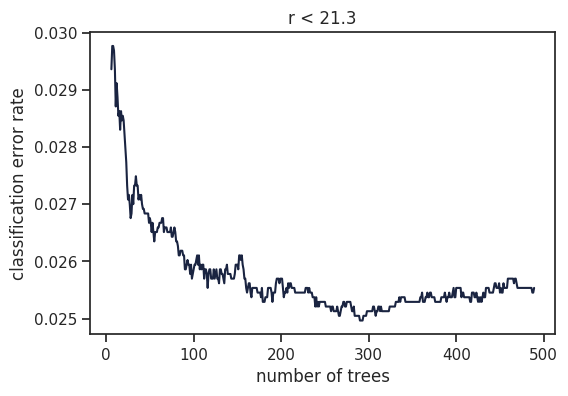

In [21]:
plot_training_history(history_top, 'r < 21.3', idx_start=6)

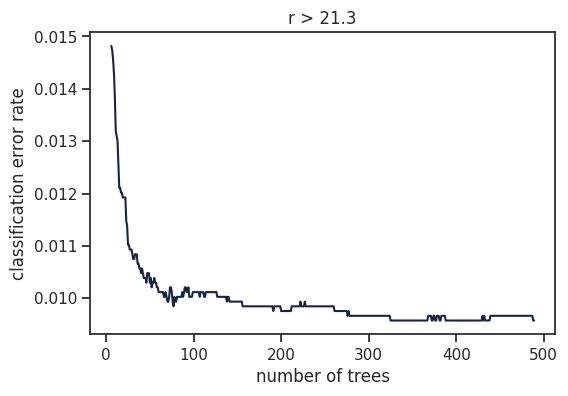

In [24]:
plot_training_history(history_random, 'r > 21.3', idx_start=6)

# XGBoost redshifts

In [25]:
xgb_z_qso = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-qso__2019-12-05_16:21:55.joblib')

[17:13:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
history_top = xgb_z_qso.evals_result()['validation_1']['rmse']
history_random = xgb_z_qso.evals_result()['validation_0']['rmse']

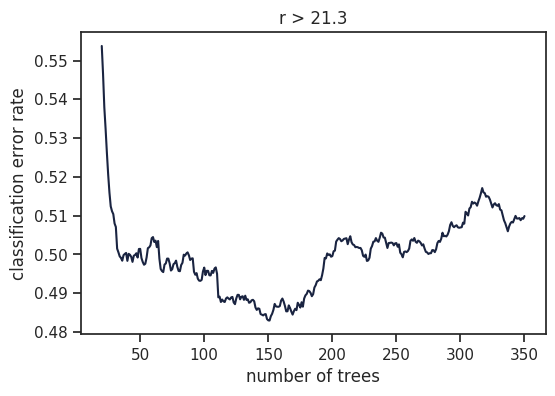

In [39]:
plot_training_history(history_top, 'r > 21.3', idx_start=20)

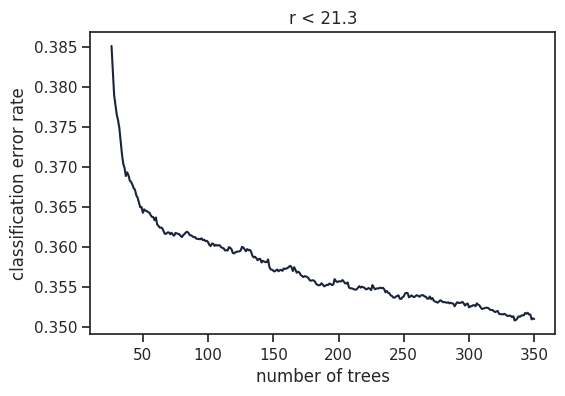

In [41]:
plot_training_history(history_random, 'r < 21.3', idx_start=26)

In [42]:
model_z_galaxy = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-galaxy__2019-12-05_16:23:09.joblib')

[17:20:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
history_top = model_z_galaxy.evals_result()['validation_1']['rmse']
history_random = model_z_galaxy.evals_result()['validation_0']['rmse']

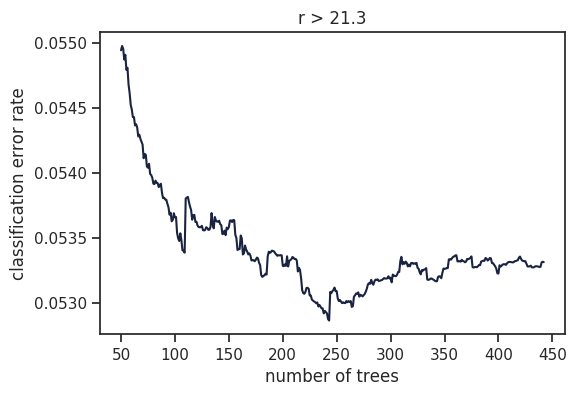

In [46]:
plot_training_history(history_top, 'r > 21.3', idx_start=50)

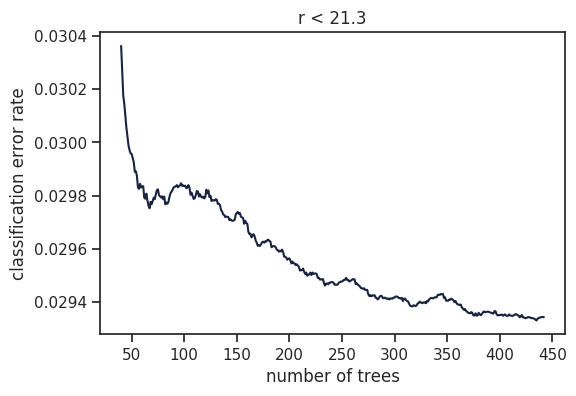

In [47]:
plot_training_history(history_random, 'r < 21.3', idx_start=40)

# ANN

In [1]:
# TODO